In [23]:
import matplotlib.pyplot as plt
import numpy as np

def group_lasso_norm(beta):  # beta_bp
    """Computes the group basis pursuit loss of the matrix beta"""
    output = np.linalg.norm(beta, axis=1).sum()
    return output

def plot_arrows(data):
    
    # Plotting the data as arrows
    plt.figure()

    for i in range(data.shape[1]):
        plt.quiver(0, 0, data[0,i], data[1,i], angles='xy', scale_units='xy', scale=1, color=f'C{i}', label=f'Vector {i+1}')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Plot of Data Vectors as Arrows')
    plt.show()
    
import cvxpy as cp


def group_basis_pursuit(
    matrix,
    eps=1e-12,
    threshold=1e-6,
    max_iters = 2500,
):
    D,P = matrix.shape
    beta = cp.Variable((P,D))  # could initialize with lasso?
#     beta.value = np.asarray([[1.,0], [0,1.],[0,0],[0,0]])
    objective = cp.Minimize(cp.sum(cp.norm(beta, axis=1)))
    constraints = [matrix @ beta == np.identity(D)]
    problem = cp.Problem(objective, constraints)
    scs_opts = {"eps": eps, "max_iters": max_iters}
    output = problem.solve(solver=cp.SCS, **scs_opts)
#     output = problem.solve(solver= cp.PROXQP)
    if output is np.inf:
        raise ValueError("No solution found")
    beta_optimized = beta.value
    beta_sparse = beta_optimized.copy()
    beta_sparse[np.abs(beta_sparse) < threshold] = 0
    return beta_sparse


In [41]:
np.random.seed(0)
D = 2
P = 4 # big enough for selelected indices to not be fully trimmed
data = np.random.multivariate_normal(np.zeros(P), np.identity(P), D)
data = data / np.linalg.norm(data, axis = 0)
data[:,:D] = np.identity(D)

In [54]:
# When Y is the identity and X contains identity we are good?
# No!
Y = np.identity(2)
for i in range(1):
    Y = np.einsum('d e, e -> d e', Y , np.linalg.norm(Y, axis = 0)**(-1))
    beta = group_basis_pursuit(data, eps = 1e-16, max_iters = 100000)
    selected_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    print("len(selected_indices)", len(selected_indices))
    X = data[:,selected_indices[:D]]
    gamma = np.linalg.inv(X) @ Y
    print(group_lasso_norm(gamma), "practical solution")
    print(group_lasso_norm(Y), "idealized solution")

len(selected_indices) 4
2.0 practical solution
2.0 idealized solution


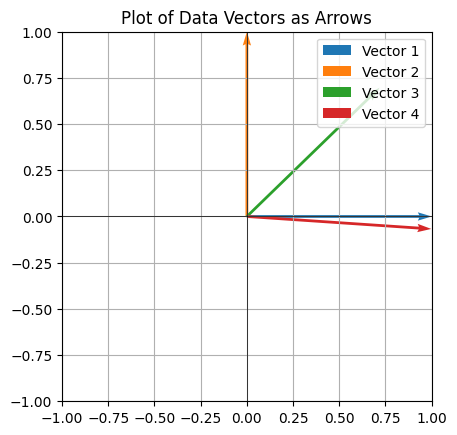

In [44]:
plot_arrows(data)

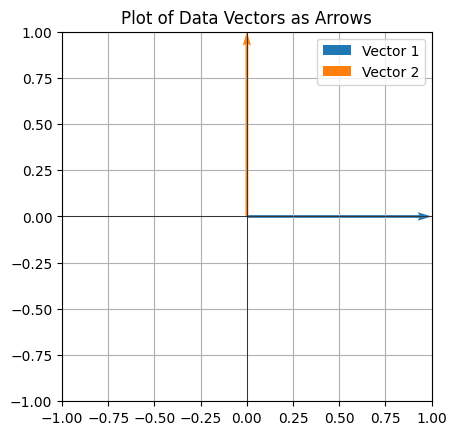

In [45]:
plot_arrows(X)

In [69]:
# With X restricted to D entries and Y identity, we are okay

X = data[:,selected_indices[:D]]
gamma = np.linalg.inv(X) @ Y
print(group_lasso_norm(gamma), "practical solution")
print(group_lasso_norm(Y), "idealized solution")

2.0 practical solution
2.0 idealized solution


In [70]:
# With X restricted to D entries and Y unitary, X identity, we are okay
Y = scipy.stats.ortho_group.rvs(2)
X = data[:,selected_indices[:D]]
gamma = np.linalg.inv(X) @ Y
print(group_lasso_norm(gamma), "practical solution")
print(group_lasso_norm(Y), "idealized solution")

2.0 practical solution
2.0 idealized solution


In [71]:
# With X restricted to D entries and X unitary, Y unitary we are okay
Y = scipy.stats.ortho_group.rvs(2)
X = scipy.stats.ortho_group.rvs(2)
gamma = np.linalg.inv(X) @ Y
print(group_lasso_norm(gamma), "practical solution")
print(group_lasso_norm(Y), "idealized solution")

2.0 practical solution
2.0 idealized solution


In [91]:
# With X restricted to D entries and X unitary, Y normalized
# This is a potentially bad situation - X is already orthogonalized and yet the numbers are different!
Y = np.random.multivariate_normal(np.zeros(2), np.identity(2), 2)
Y = np.einsum('d e, e -> d e', Y , np.linalg.norm(Y, axis = 0)**(-1))
# X = scipy.stats.ortho_group.rvs(2)
X = np.identity(2)
gamma = np.linalg.inv(X) @ Y
print(group_lasso_norm(gamma), "practical solution")
print(group_lasso_norm(Y), "idealized solution")

1.985065500317016 practical solution
1.985065500317016 idealized solution


In [92]:
np.linalg.norm(Y[:,:2], axis = 0)

array([1., 1.])

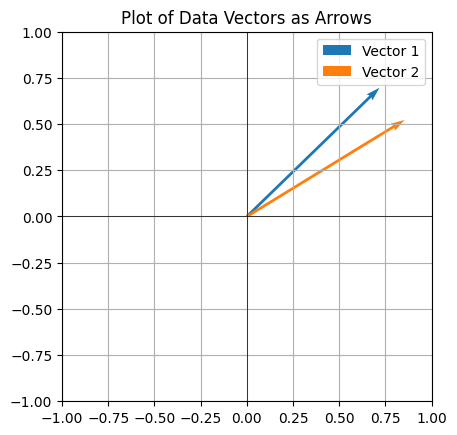

In [93]:
plot_arrows(Y)

In [97]:
Y = scipy.stats.ortho_group.rvs(2)
# X = scipy.stats.ortho_group.rvs(2)
gamma = np.linalg.inv(X) @ Y
print(group_lasso_norm(gamma), "practical solution")
print(group_lasso_norm(Y), "idealized solution")

2.0 practical solution
2.0 idealized solution


In [126]:
# With X restricted to D entries and X unitary, Y normalized
# This is a potentially bad situation - X is already orthogonalized and yet the numbers are different!
Y = np.random.multivariate_normal(np.zeros(2), np.identity(2), 2)
Y = np.einsum('d e, e -> d e', Y , np.linalg.norm(Y, axis = 0)**(-1))
X = scipy.stats.ortho_group.rvs(2) # this makes a break between the norm of the idealized and practical solution
gamma = np.linalg.inv(X) @ Y
print(group_lasso_norm(gamma), "practical solution")
print(group_lasso_norm(Y), "idealized solution")

1.9999511850136096 practical solution
1.9999715001337512 idealized solution


In [118]:
# With X restricted to D entries and X unitary, Y normalized
# This is a potentially bad situation - X is already orthogonalized and yet the numbers are different!
Y = scipy.stats.ortho_group.rvs(2)
Y = np.einsum('d e, e -> d e', Y , np.linalg.norm(Y, axis = 0)**(-1))
X = scipy.stats.ortho_group.rvs(2) # this makes a break between the norm of the idealized and practical solution
gamma = np.linalg.inv(X) @ Y
print(group_lasso_norm(gamma), "practical solution")
print(group_lasso_norm(Y), "idealized solution")

2.0 practical solution
2.0 idealized solution


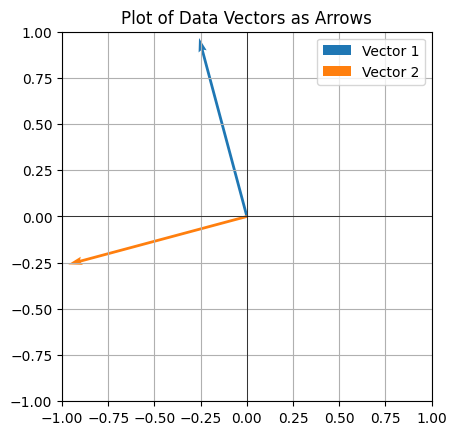

In [123]:
plot_arrows(X)

In [114]:
gamma

array([[0.8513998 , 0.45956425],
       [0.52451728, 0.88814453]])

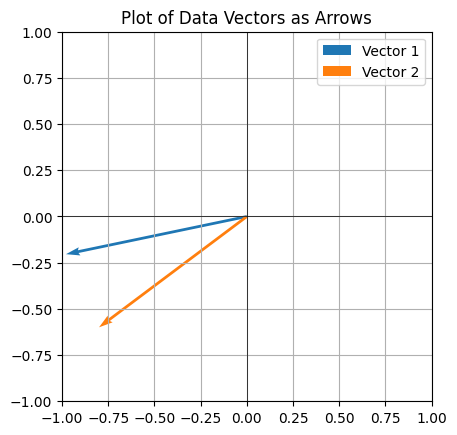

In [124]:
plot_arrows(Y)

In [64]:
# # When Y is unitary and X contains identity we are good?
# import scipy

# Y = np.identity(2)
# for i in range(5):
#     Y = scipy.stats.ortho_group.rvs(2)
#     beta = group_basis_pursuit(data, eps = 1e-16, max_iters = 100000)
#     selected_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
#     print("len(selected_indices)", len(selected_indices))
#     X = data[:,selected_indices[:D]]
#     gamma = np.linalg.inv(X) @ Y
#     print(group_lasso_norm(gamma), "practical solution")
#     print(group_lasso_norm(Y), "idealized solution")